A Support Vector Machine (SVM) is a versatile model that is particularly well suited for classification of complex small- or medium-sized datasets. SVMs are capable of both linear and nonlinear classification, regression, and outlier detection.

Topics:
- Linear SVM Classification
- Nonlinear SVM Classification
- SVM Regression
- Math & Theory Details

# Linear SVM Classification

Linear SVM Classification is a form of *large margin classification* that determines a decision boundary with the largest possible margin between classes.

*Support vectors* are instances located at the edge of the margin that define the decision boundary.

SVMs are sensitive to feature scales due to their motivation to maximize distance between support vectors. Imbalanced feature scales can result in some features (with larger scales) dominating the maximum distance calculation, so scaling data is an important step before training.

## Soft Margin Classification

Classification that relies on all instances being outside the margins defined by the decision boundary is called **hard margin classification**, which has two prominent issues:

- It only works if the data is linearly separable
- It is sensitive to outliers

**Soft Margin Classification** solves these issues by finding a balance between large margins and allowed margin violations. This balance is defined by regularization parameter $C$. 

- A lower $C$ value allows a large number of margin violations to enable a larger margin
- A higher $C$ value restricts the number of margin violations to reduce the margin size

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()

# Include petal length and petal width
X = iris['data'][:, (2, 3)]

# Target Iris virginica
y = (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))    
])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [3]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [4]:
# Could also use the standard SVC class
from sklearn.svm import SVC

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('standard_svc', SVC(kernel='linear', C=1))  
])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('standard_svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [5]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [6]:
# Could also use the SGD Classifier for out-of-core training on large or online datasets
from sklearn.linear_model import SGDClassifier

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_sgd', SGDClassifier(loss='hinge', alpha=1/(10*1))) # alpha=1/(m*C  
])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_sgd',
                 SGDClassifier(alpha=0.1, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [7]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

# Nonlinear SVM Classification

One issue encountered with linear SVM classifiers is that data is rarely linearly separable. One approach for such datasets is to add polynomial features.

In [8]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

# Generate sample 'moons' data in the form of overlapping half circles
X, y = make_moons(n_samples=100, noise=0.15, random_state=47)

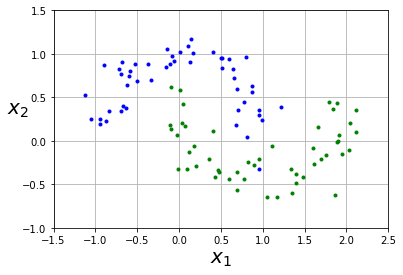

In [9]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b.")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g.")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

axes = [-1.5, 2.5,  -1, 1.5]
plot_dataset(X, y, axes)

In [10]:
# Include PolynomialFeatures in the pipeline
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=10000))
])
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=10000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

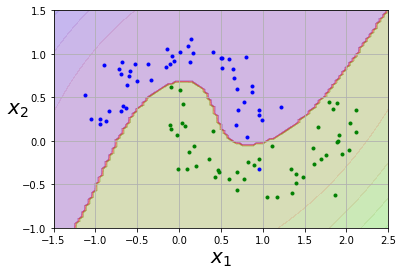

In [11]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_dataset(X, y, axes)
plot_predictions(polynomial_svm_clf, axes)

- Low-degree polynomial features can't handle more complex datasets
- High-degree polynomial features introduce training complexity and severely impact performance

## Polynomial Kernel

The SVC class implements a kernel trick, which can provide the same benefits of adding multiple polynomial features without the added training complexity.

In [12]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

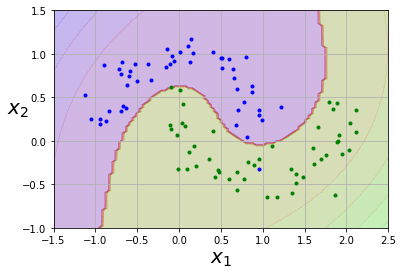

In [13]:
plot_dataset(X, y, axes)
plot_predictions(poly_kernel_svm_clf, axes)

## Similarity Features

A **similarity function** measures how much each instance resembles a **landmark** instance selected as a reference. A common similarity function is the Gaussian Radial Basis Function (RBF).

*Equation 1: Gaussian RBF*

\begin{equation*}
\phi_y(\mathbf{x},\ell)=\text{exp}\bigl(-y||\mathbf{x}-\ell||^2\bigr)
\end{equation*}

In [204]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

# Random data points that are not linearly separable
x_1 = np.random.uniform(-4, 4, 9).reshape(-1, 1)

# Landmarks for x_1
landmarks = x_1[2], x_1[6]

# Gaussian RBF for each landmark
x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, landmarks[0], gamma)
x3s = gaussian_rbf(x1s, landmarks[1], gamma)
landmarks

(array([2.94041461]), array([-1.03661153]))

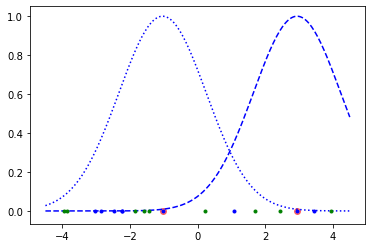

In [205]:
# Visualization for each landmark
plt.plot(x1s, x2s, 'b--')
plt.plot(x1s, x3s, 'b:')
plt.plot(x_1, np.zeros(9), 'b.')
plt.plot(x_2, np.zeros(9), 'g.')
plt.scatter(landmarks, np.zeros(len(landmarks)), alpha=0.5, c='red')

[-0.1, 1.1, -0.1, 1.1]

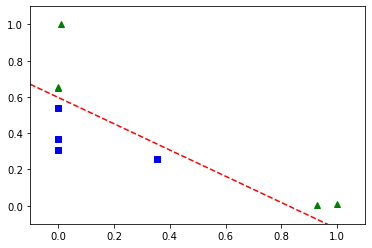

In [213]:
# Apply the Gaussian RBF to the data for each landmark and separate by similarity
x_k = np.c_[gaussian_rbf(x_1, landmarks[0], gamma), gaussian_rbf(x_1, landmarks[1], gamma)]
y_k = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])
plt.plot(x_k[:, 0][y_k==0], x_k[:, 1][y_k==0], "bs")
plt.plot(x_k[:, 0][y_k==1], x_k[:, 1][y_k==1], "g^")
plt.plot([-0.1, 1.1], [0.67, -0.2], "r--")

# Demonstrate linear separability
plt.axis([-0.1, 1.1, -0.1, 1.1])